## Load Data

In [ ]:
# load libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# local urls
uom_space_url = '../project-data/uom-space.xlsx'
rm_category_type_url = '../project-data/rm-category-type-cleaned.xlsx'
em_location_url = '../project-data/em-location.xlsx'
av_equipment_url = '../project-data/av-equipment.xlsx'
timetable_2020_url = '../project-data/2020-timetable-v2.xlsx'
floor_name_url = '../project-data/fl-name-cleaned.xlsx'
meeting_room_usage_url = '../project-data/meeting-room-usage.xlsx'

# drive urls
uom_space_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/uom-space.xlsx'
rm_category_type_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/rm-category-type-cleaned.xlsx'
em_location_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/em-location.xlsx'
av_equipment_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/av-equipment.xlsx'
timetable_2020_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/2020-timetable-v2.xlsx'
floor_name_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/fl-name-cleaned.xlsx'
meeting_room_usage_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/meeting-room-usage.xlsx'

In [ ]:
uom_space_df = pd.read_excel(uom_space_url)

In [ ]:
rm_category_type_df = pd.read_excel(rm_category_type_url)

In [ ]:
em_location_df = pd.read_excel(em_location_url)

In [ ]:
av_equipment_df = pd.read_excel(av_equipment_url)

In [ ]:
timetable_df = pd.read_excel(timetable_2020_url, delim_whitespace=True)

In [ ]:
floor_df = pd.read_excel(floor_name_url)

In [ ]:
meeting_room_usage_df = pd.read_excel(meeting_room_usage_url)

In [ ]:
# data shapes
print("UOM space shape:"+str(uom_space_df.shape))
print("RM category:"+str(rm_category_type_df.shape))
print("EM location:"+str(em_location_df.shape))
print("AV equipment:"+str(av_equipment_df.shape))
print("2020 timetable:"+str(timetable_df.shape))
print("Floor data shape:"+str(floor_df.shape))
print("Meeting room usage shape:"+str(meeting_room_usage_df.shape))

UOM space shape:(22166, 14)
RM category:(209, 5)
EM location:(7709, 4)
AV equipment:(1964, 11)
2020 timetable:(131857, 23)
Floor data shape:(1369, 3)
Meeting room usage shape:(1462, 22)


## Clean + Mutate Data

In [ ]:
# clean uom-space
uom_space_df['Campus Code']=uom_space_df['Campus Code'].astype(str).str.strip()
uom_space_df['Building Code']=uom_space_df['Building Code'].astype(str).str.strip()
uom_space_df['Building Name']=uom_space_df['Building Name'].astype(str).str.strip()
uom_space_df['Room Type']=uom_space_df['Room Type'].astype(str).str.strip()
uom_space_df['Room Category']=uom_space_df['Room Category'].astype(str).str.strip()
uom_space_df['Floor Code']=uom_space_df['Floor Code'].astype(str).str.strip()
uom_space_df['Room Code']=uom_space_df['Room Code'].astype(str).str.strip()

In [ ]:
uom_space_df.describe()

,Room Capacity,Room Area m²
count,20412.000000,22166.000000
mean,4.062708,30.705665
std,17.259225,118.307023
min,0.000000,0.220000
25%,0.000000,7.810000
50%,0.000000,13.390000
75%,2.000000,25.230000
max,599.000000,5696.900000


In [ ]:
# clean rm-category-type
rm_category_type_df['Room Type']=rm_category_type_df['Room Type'].astype(str).str.strip()
rm_category_type_df['Room Category']=rm_category_type_df['Room Category'].astype(str).str.strip()
rm_category_type_df['Room Type Abbreviation']=rm_category_type_df['Room Type Abbreviation'].str.lower().str.strip()
rm_category_type_df['Description']=rm_category_type_df['Description'].str.lower().str.strip()
rm_category_type_df['Room Type Definition']=rm_category_type_df['Room Type Definition'].str.lower().str.strip()

In [ ]:
# clean floor-data
floor_df['Building Code'] = floor_df['Building Code'].astype(str).str.strip()
floor_df['Floor Code'] = floor_df['Floor Code'].astype(str).str.strip()
floor_df['Floor Name'] = floor_df['Floor Name'].astype(str).str.strip()

In [ ]:
# clean em-location
em_location_df['Floor Code'] = em_location_df['Floor Code'].astype(int)
em_location_df['Floor Code'] = em_location_df['Floor Code'].astype(str).str.strip()

# clean room codes
for idx,row in em_location_df.iterrows():
    if "." in row['Room Code']:
        code = row['Room Code'].split(".")[0]
        em_location_df.at[idx,'Room Code'] = code

In [ ]:
# clean av-equipment
av_equipment_df['Room Type'] = av_equipment_df['Room Type'].astype(str).str.strip()
av_equipment_df['Room Code'] = av_equipment_df['Room Code'].astype(str).str.strip()
av_equipment_df['Building Code'] = av_equipment_df['Building Code'].astype(str).str.strip()
av_equipment_df['Campus Code'] = av_equipment_df['Campus Code'].astype(str).str.strip()
av_equipment_df['Equip. Status'] = av_equipment_df['Equip. Status'].astype(str).str.strip()
av_equipment_df['Floor Code'] = av_equipment_df['Floor Code'].astype(int).astype(str).str.strip()

In [ ]:
# clean timetable-df

# remove all NaN rows
timetable_df = timetable_df.dropna(how='all')

# drop duplicate records
timetable_df = timetable_df.drop_duplicates()

# dropping classes whose location is not planned
timetable_df = timetable_df[timetable_df['Host Key of Allocated Locations'].notna()]

# dropping classes whose location is online option
timetable_df = timetable_df[timetable_df['Host Key of Allocated Locations']!='Online option.']

# dropping classes with off-site location
timetable_df = timetable_df[timetable_df['Name of Zone of Allocated Locations']!='Off-Site']

In [ ]:
timetable_df.describe()

,Host Key of Department,Name of Children,Planned Size,Name of Allocated Locations of Children,Size of Allocated Locations,Teaching week pattern as start week,Teaching week pattern as number of weeks
count,119419.000000,0.0,119419.000000,0.0,119419.000000,119419.000000,119419.000000
mean,411.698884,NaN,50.291813,NaN,60.704193,10.738467,11.446051
std,207.371644,NaN,81.505902,NaN,82.939819,3.485513,2.831630
min,39.000000,NaN,0.000000,NaN,4.000000,3.000000,1.000000
25%,259.000000,NaN,19.000000,NaN,20.000000,10.000000,12.000000
50%,418.000000,NaN,22.000000,NaN,30.000000,10.000000,12.000000
75%,620.000000,NaN,38.000000,NaN,58.000000,10.000000,12.000000
max,762.000000,NaN,684.000000,NaN,1000.000000,27.000000,24.000000


In [ ]:
# mutate timetable data
building_codes = []
room_codes = []
campus_codes = []
class_duration_minutes = []
for idx,row in timetable_df.iterrows():
    s = row['Host Key of Allocated Locations'].split('-')
    building_codes.append(s[0])
    room_codes.append(s[1])
    c = row['Name of Allocated Locations'].split('-')[0]
    if c == 'zzzPAR':
        c = 'PAR'
    campus_codes.append(c)
    d = row['Duration as duration']
    class_duration_minutes.append(d.hour * 60 + d.minute)
timetable_df['Building Code'] = building_codes
timetable_df['Room Code'] = room_codes
timetable_df['Campus Code'] = campus_codes
timetable_df['Class Duration In Minutes'] = class_duration_minutes

In [ ]:
# meeting room usage cleanup
meeting_room_usage_df = meeting_room_usage_df[meeting_room_usage_df['Campus Code'].notna()]
meeting_room_usage_df = meeting_room_usage_df[meeting_room_usage_df['Building Code'].notna()]
meeting_room_usage_df = meeting_room_usage_df[meeting_room_usage_df['Floor Code'].notna()]
meeting_room_usage_df = meeting_room_usage_df[meeting_room_usage_df['Room Code'].notna()]

meeting_room_usage_df['Campus Code'] = meeting_room_usage_df['Campus Code'].astype(str).str.strip()
meeting_room_usage_df['Building Code'] = meeting_room_usage_df['Building Code'].astype(str).str.strip()
meeting_room_usage_df['Building Name'] = meeting_room_usage_df['Building Name'].astype(str).str.strip()
meeting_room_usage_df['Floor Code'] = meeting_room_usage_df['Floor Code'].astype(int).astype(str).str.strip()
meeting_room_usage_df['Room Code'] = meeting_room_usage_df['Room Code'].astype(str).str.strip()

In [ ]:
meeting_room_usage_df.shape

(890, 22)

In [ ]:
stats_em_location = {
    'Stats':['Campus Code','Building Code','Floor Code','Room Code'],
    'Count':[
             len(meeting_room_usage_df.groupby('Campus Code')),
             len(meeting_room_usage_df.groupby('Building Code')),
             len(meeting_room_usage_df.groupby('Floor Code')),
             len(meeting_room_usage_df.groupby('Room Code'))
    ]
}
stats = pd.DataFrame(data=stats_em_location)
stats

,Stats,Count
0,Campus Code,8
1,Building Code,125
2,Floor Code,13
3,Room Code,511


In [ ]:
meeting_room_usage_df.describe()

,RoomName,Meetings,Duration,AvgDuration,TotAttendees,AvgAttendees,ReqAttendees,OptAttendees,AMtotal,AMperc,PMtotal,PMperc,RecTotal,RecPerc
count,0.0,890.000000,8.900000e+02,8.900000e+02,890.000000,890.000000,0.0,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,NaN,241.635955,4.447746e+04,4.501891e+03,718.838202,1.875281,NaN,58.892135,117.521348,38.317978,124.114607,34.378652,76.722472,21.206742
std,NaN,299.368071,1.591167e+05,6.591947e+04,1165.279191,1.877927,NaN,154.949325,146.507601,29.602371,164.661552,27.724042,124.669067,27.424833
min,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,105.000000,1.661000e+04,6.800000e+01,148.000000,2.000000,NaN,3.000000,51.500000,43.000000,39.500000,46.000000,17.000000,11.000000
75%,NaN,414.250000,4.545375e+04,1.407500e+02,1055.000000,3.000000,NaN,69.000000,192.750000,53.000000,222.750000,56.000000,110.000000,33.000000
max,NaN,1000.000000,3.727650e+06,1.665480e+06,8704.000000,16.000000,NaN,2772.000000,811.000000,100.000000,748.000000,100.000000,969.000000,100.000000


## Merge Data

In [ ]:
# Merge - uom_space + floor_data
uom_space_df_enhanced = pd.merge(uom_space_df,floor_df,on=['Building Code','Floor Code'])
print((uom_space_df.shape, uom_space_df_enhanced.shape))
print('Unable to merge records:',uom_space_df.shape[0]-uom_space_df_enhanced.shape[0])

((22166, 14), (22166, 15))
Unable to merge records: 0


In [ ]:
# Merge - enhanced_uom_space + rm_category_type
# !! perfect match !!
merged_space_data_df = pd.merge(uom_space_df_enhanced,rm_category_type_df,on=['Room Category','Room Type'])
print((uom_space_df_enhanced.shape, merged_space_data_df.shape))
print('Unable to merge records:',uom_space_df_enhanced.shape[0]-merged_space_data_df.shape[0])

((22166, 15), (22166, 18))
Unable to merge records: 0


In [ ]:
# merge - space_data + em_location
merged_em_location_df = pd.merge(em_location_df,merged_space_data_df,on=['Building Code','Floor Code','Room Code'])
print((em_location_df.shape, merged_em_location_df.shape))
print('Unable to merge records:',em_location_df.shape[0]-merged_em_location_df.shape[0])

((7709, 4), (6962, 19))
Unable to merge records: 747


In [ ]:
# merge - space_data + av_equipment
merged_av_equipment_df = pd.merge(av_equipment_df,merged_space_data_df,on=['Campus Code','Building Code','Floor Code','Room Code'])
print((av_equipment_df.shape, merged_av_equipment_df.shape))
print('Unable to merge records:',av_equipment_df.shape[0]-merged_av_equipment_df.shape[0])

((1964, 11), (1646, 25))
Unable to merge records: 318


In [ ]:
# merge - space_data + timetable_data
merged_timetable_df = pd.merge(timetable_df,merged_space_data_df,on=['Campus Code','Building Code','Room Code'])
print((timetable_df.shape, merged_timetable_df.shape))
print('Unable to merge records:',timetable_df.shape[0]-merged_timetable_df.shape[0])

((119419, 27), (116981, 42))
Unable to merge records: 2438


In [ ]:
# merge - space_data + meeting_room_usage
merged_meeting_room_usage_df = pd.merge(meeting_room_usage_df,merged_space_data_df,on=['Campus Code','Building Code','Floor Code','Room Code'])
print((meeting_room_usage_df.shape, merged_meeting_room_usage_df.shape))
print('Unable to merge records:',meeting_room_usage_df.shape[0]-merged_meeting_room_usage_df.shape[0])

((890, 22), (728, 36))
Unable to merge records: 162


## Meeting Rooms Analysis (Parkville Campus)

In [ ]:
merged_space_data_df_PAR = merged_space_data_df[merged_space_data_df['Campus Code']=='PAR']
merged_em_location_df_PAR = merged_em_location_df[merged_em_location_df['Campus Code']=='PAR']
merged_av_equipment_df_PAR = merged_av_equipment_df[merged_av_equipment_df['Campus Code']=='PAR']
merged_meeting_room_usage_df_PAR = merged_meeting_room_usage_df[merged_meeting_room_usage_df['Campus Code']=='PAR']

### Supply of Meeting Rooms?

In [ ]:
# possible meeting rooms
possible_rooms = rm_category_type_df[rm_category_type_df['Room Type'].str.contains("601|629")]
meeting_room_types = possible_rooms['Room Type'].tolist()

# supply of meeting rooms
possible_meeting_rooms_df = merged_space_data_df_PAR[merged_space_data_df_PAR['Room Type'].isin(meeting_room_types)]
possible_meeting_rooms_df.shape

(692, 18)

### Demand of Meeting Rooms?

In [ ]:
# Number of staff members data in parkville
merged_em_location_df_PAR.shape

(6505, 19)

### Supply vs Demand analysis of preferences/factors?

#### 1. What if staff want to book a meeting room in the **same building**?

##### Count graphs

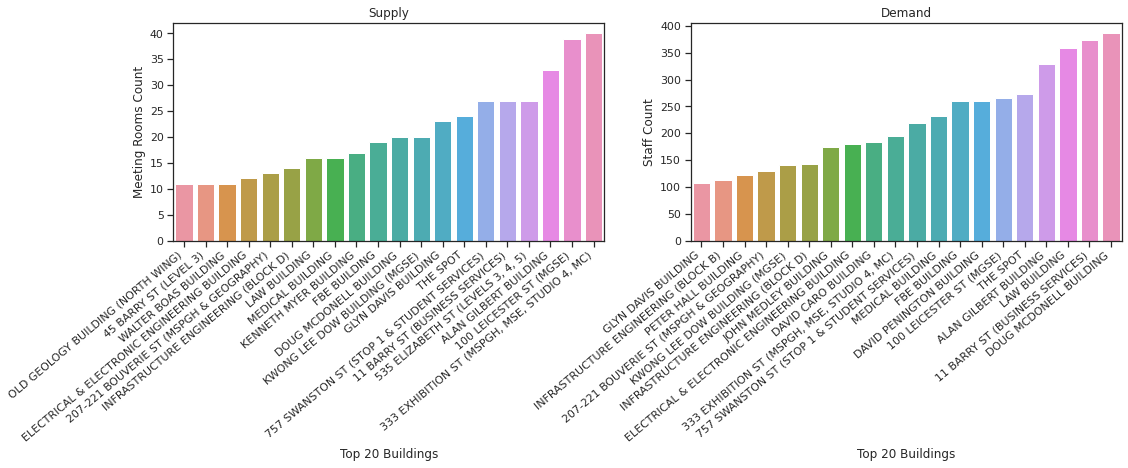

In [ ]:

gdf1 = possible_meeting_rooms_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Building Name", y='Room Code', data=gdf1.tail(20),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Buildings', ylabel='Meeting Rooms Count')
ax1.set_title('Supply')

ax2 = sns.barplot(x="Building Name", y='Employee Sequential ID', data=gdf2.tail(20),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Buildings', ylabel='Staff Count')
ax2.set_title('Demand')

plt.show()

##### Proportions graphs

In [ ]:

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_emp = gdf2['Employee Sequential ID'].sum()
gdf2['Employee Sequential ID'] = gdf2['Employee Sequential ID']/total_emp

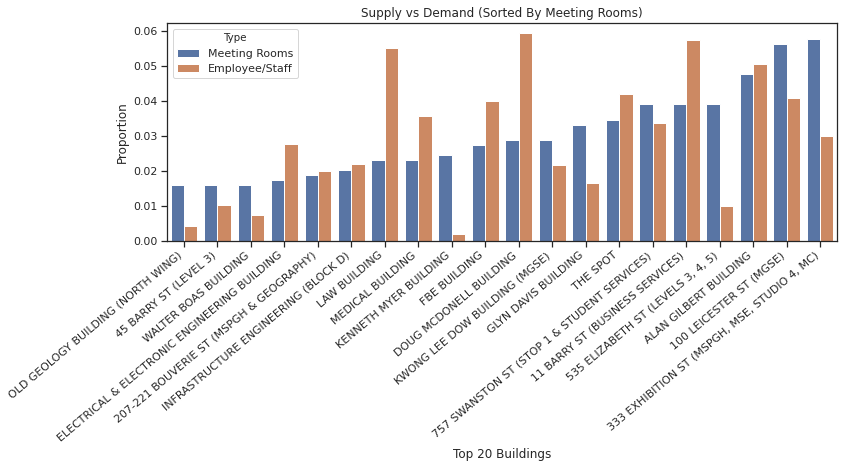

In [ ]:

# proportion graph
gd = pd.merge(gdf1, gdf2, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Meeting Rooms)")
plt.show()

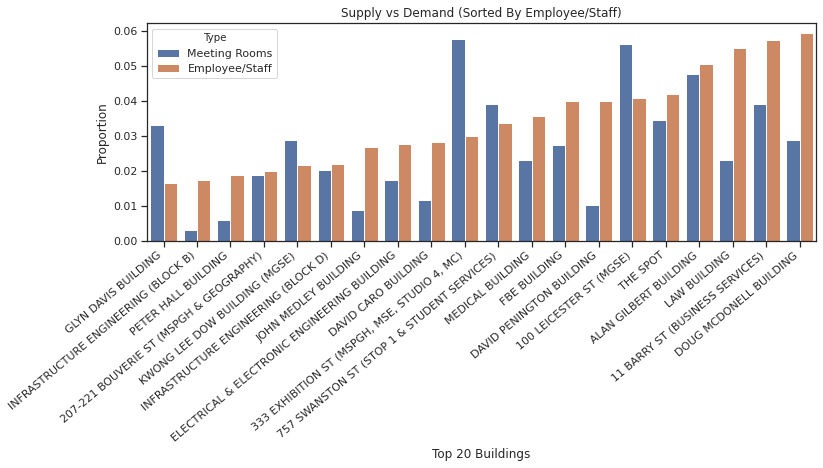

In [ ]:

gd = pd.merge(gdf2, gdf1, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Employee/Staff)")
plt.show()

#### 2. What if staff wants to book a meeting room at the **same floor**?

##### Where most of the meeting rooms are available vs Where most of the employee/staff members are sitting ?

In [ ]:
#@title
# 333 EXHIBITION ST (MSPGH, MSE, STUDIO 4, MC)
possible_meeting_rooms_df_f = possible_meeting_rooms_df[possible_meeting_rooms_df['Building Name']=='333 EXHIBITION ST (MSPGH, MSE, STUDIO 4, MC)']
gdf1 = possible_meeting_rooms_df_f.groupby(by=['Floor Name'], as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

merged_em_location_df_f = merged_em_location_df[merged_em_location_df['Building Name']=='333 EXHIBITION ST (MSPGH, MSE, STUDIO 4, MC)']
gdf2 = merged_em_location_df_f.groupby(by='Floor Name', as_index=False).agg({'Employee Sequential ID': pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_emp = gdf2['Employee Sequential ID'].sum()
gdf2['Employee Sequential ID'] = gdf2['Employee Sequential ID']/total_emp

In [ ]:
#@title
possible_meeting_rooms_df_f_2 = possible_meeting_rooms_df[possible_meeting_rooms_df['Building Name']=='DOUG MCDONELL BUILDING']
gdf3 = possible_meeting_rooms_df_f_2.groupby(by=['Floor Name'], as_index=False).agg({'Room Code': pd.Series.nunique})
gdf3.sort_values(by=['Room Code'], inplace=True)

merged_em_location_df_f_2 = merged_em_location_df[merged_em_location_df['Building Name']=='DOUG MCDONELL BUILDING']
gdf4 = merged_em_location_df_f_2.groupby(by='Floor Name', as_index=False).agg({'Employee Sequential ID': pd.Series.nunique})
gdf4.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf3['Room Code'].sum()
gdf3['Room Code'] = gdf3['Room Code']/total_rooms

total_emp = gdf4['Employee Sequential ID'].sum()
gdf4['Employee Sequential ID'] = gdf4['Employee Sequential ID']/total_emp

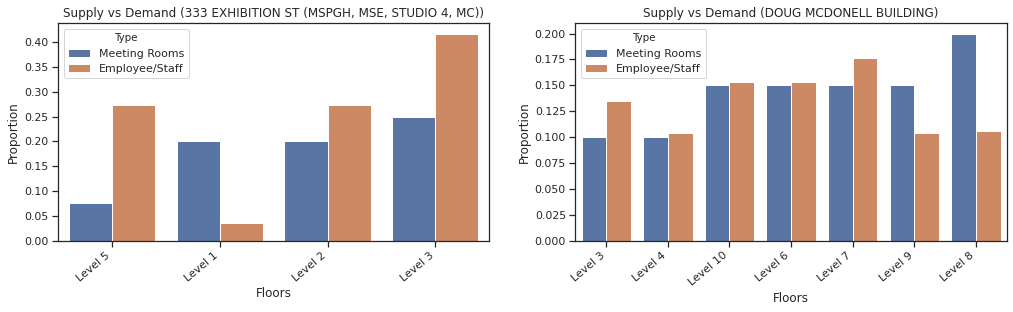

In [ ]:
#@title
# proportion graph
gd1 = pd.merge(gdf1, gdf2, on=['Floor Name'])
d = {
    'Floor Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd1.iterrows():
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df1 = pd.DataFrame(data=d)

# proportion graph
gd2 = pd.merge(gdf3, gdf4, on=['Floor Name'])
d = {
    'Floor Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd2.iterrows():
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df2 = pd.DataFrame(data=d)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Floor Name", y='Value', hue='Type', dodge=True, data=df1,ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Floors', ylabel='Proportion')
ax1.set_title("Supply vs Demand (333 EXHIBITION ST (MSPGH, MSE, STUDIO 4, MC))")

ax2 = sns.barplot(x="Floor Name", y='Value', hue='Type', dodge=True, data=df2,ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Floors', ylabel='Proportion')
ax2.set_title("Supply vs Demand (DOUG MCDONELL BUILDING)")

plt.show()

#### 3. What if staff wants to book a meeting room **closest** to where the staff is sitting?

- We need to do spatial analysis
- More data is needed: coordinates and arrangement of room codes
- Floor plan of the building

- **closest building**

#### 4. What if staff wants to book a meeting room with **equipments**?



##### How many meeting rooms are available with equipments?

In [ ]:
# 601,629 are possible room types for meeting rooms
av_meeting_rooms_df = merged_av_equipment_df_PAR[merged_av_equipment_df_PAR['Room Type_x'].str.contains('601|629')]
av_meeting_rooms_df.shape

(90, 25)

##### What are different manufacturers and equipment standards available in the meeting rooms?

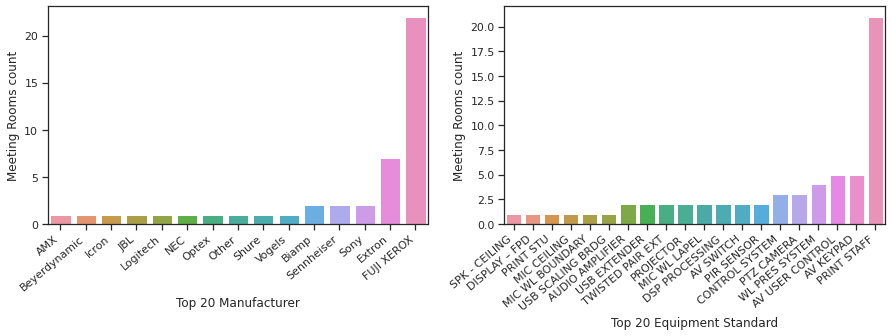

In [ ]:

gdf1 = av_meeting_rooms_df.groupby(by='Manufacturer', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = av_meeting_rooms_df.groupby(by='Equipment Standard', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Manufacturer", y='Room Code', data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Manufacturer', ylabel='Meeting Rooms count')

ax2 = sns.barplot(x="Equipment Standard", y='Room Code', data=gdf2.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Equipment Standard', ylabel='Meeting Rooms count')

plt.show()

##### Proportion graph across buildings?

In [ ]:

gdf1 = av_meeting_rooms_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Equipment Code': pd.Series.nunique})
gdf1.sort_values(by=['Equipment Code'], inplace=True)

gdf2 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

total_eqp = gdf1['Equipment Code'].sum()
gdf1['Equipment Code'] = gdf1['Equipment Code']/total_eqp

total_emp = gdf2['Employee Sequential ID'].sum()
gdf2['Employee Sequential ID'] = gdf2['Employee Sequential ID']/total_emp

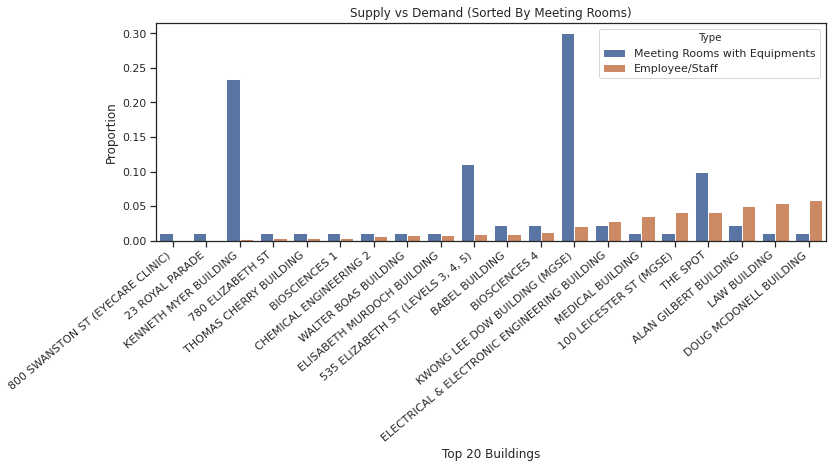

In [ ]:

# proportion graph
gd = pd.merge(gdf2, gdf1, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Rooms with Equipments')
    d['Value'].append(row['Equipment Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Meeting Rooms)")
plt.show()

#### 5. What if staff wants to book a meeting room in the **same department**?

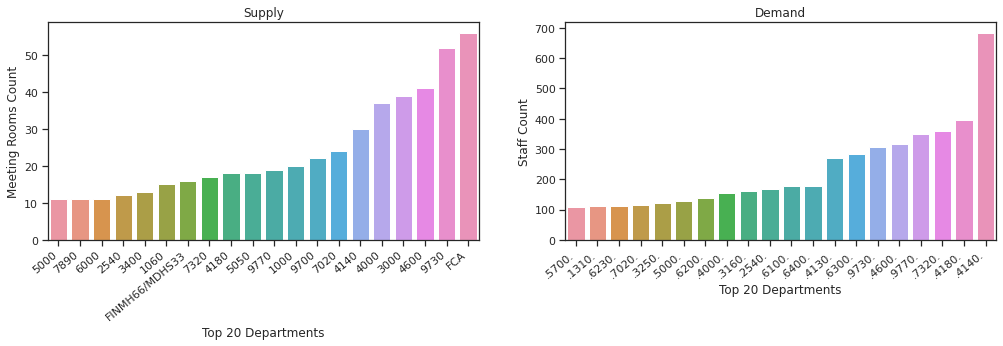

In [ ]:
#@title
gdf1 = possible_meeting_rooms_df.groupby(by=['Department Code'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = merged_em_location_df.groupby(by=['Department Code'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

gdf2['Department Code 2'] = gdf2['Department Code']
for idx,row in gdf2.iterrows():
    gdf2.at[idx,'Department Code 2'] = '.'+row['Department Code 2']+'.'

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Department Code", y='Room Code', data=gdf1.tail(20),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Departments', ylabel='Meeting Rooms Count')
ax1.set_title('Supply')

ax2 = sns.barplot(x="Department Code 2", y='Employee Sequential ID', data=gdf2.tail(20),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Departments', ylabel='Staff Count')
ax2.set_title('Demand')

plt.show()

In [ ]:
#@title
# proportion graph
total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_emp = gdf2['Employee Sequential ID'].sum()
gdf2['Employee Sequential ID'] = gdf2['Employee Sequential ID']/total_emp

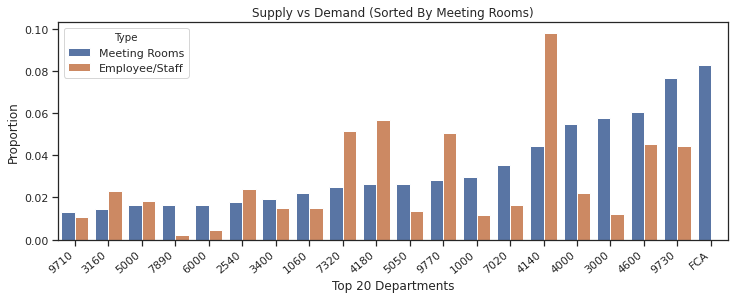

In [ ]:
#@title
gd = pd.merge(gdf1, gdf2, on=['Department Code'])
d = {
    'Department Code':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Department Code", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Departments', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Meeting Rooms)")
plt.show()

#### 6. What if staff wants to book a meeting room with 'Good or Excellent' **Room Condition**?

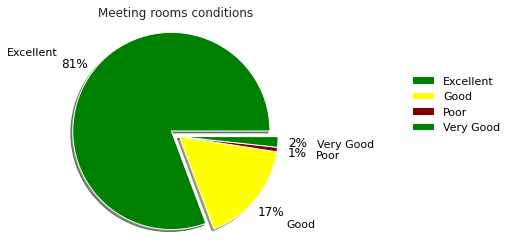

In [ ]:
#@title
# meeting room conditions
gdf = possible_meeting_rooms_df.groupby(by=['Room Condition 2018'], as_index=False).agg({'Room Code': pd.Series.nunique})
total_rooms = gdf['Room Code'].sum()
gdf['Room Code'] = (gdf['Room Code']/total_rooms)*100
gdf.sort_values(by=['Room Condition 2018'], inplace=True)
fig, ax = plt.subplots()
plt.rcParams['text.color'] = '#000'
plt.rcParams['axes.labelcolor']= '#000'
plt.rcParams['xtick.color'] = '#000'
plt.rcParams['ytick.color'] = '#000'
labels = gdf['Room Condition 2018'].tolist()
percentages = gdf['Room Code'].tolist()
color_palette_list = ['#008000', '#FFFF00', '#800000', '#00FF00']
explode=(0.1,0,0,0)
ax.pie(percentages, explode=explode, labels=labels,autopct='%1.0f%%', 
        colors = color_palette_list[0:3],
       shadow=True, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Meeting rooms conditions")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [ ]:
#@title
possible_meeting_rooms_df_f = possible_meeting_rooms_df[possible_meeting_rooms_df['Room Condition 2018']=='Excellent']
gdf1 = possible_meeting_rooms_df_f.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_emp = gdf2['Employee Sequential ID'].sum()
gdf2['Employee Sequential ID'] = gdf2['Employee Sequential ID']/total_emp

In [ ]:
#@title
possible_meeting_rooms_df_f = possible_meeting_rooms_df[possible_meeting_rooms_df['Room Condition 2018']=='Good']
gdf3 = possible_meeting_rooms_df_f.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf3.sort_values(by=['Room Code'], inplace=True)

gdf4 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf4.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf3['Room Code'].sum()
gdf3['Room Code'] = gdf3['Room Code']/total_rooms

total_emp = gdf4['Employee Sequential ID'].sum()
gdf4['Employee Sequential ID'] = gdf4['Employee Sequential ID']/total_emp

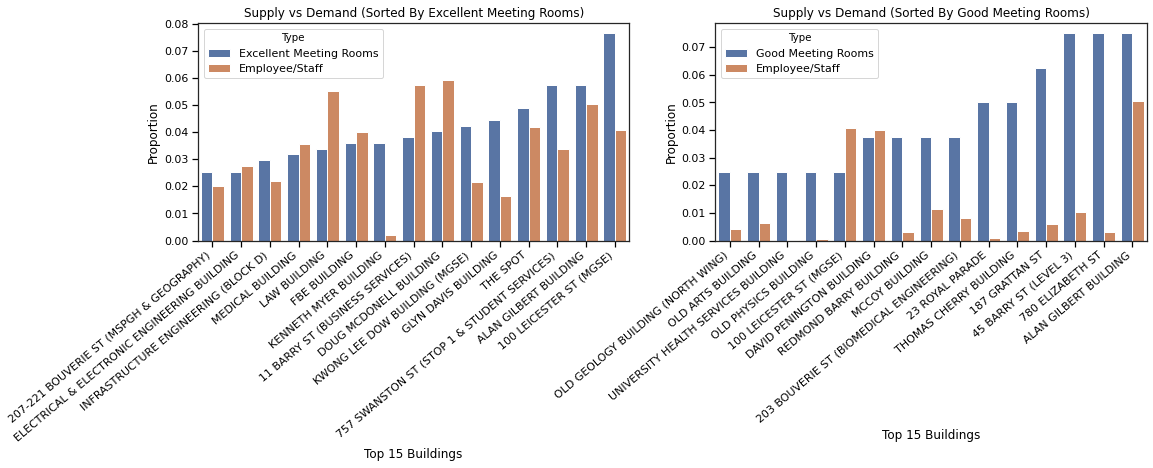

In [ ]:
#@title
# proportion graph
gd = pd.merge(gdf1, gdf2, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Excellent Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df1 = pd.DataFrame(data=d)

gd = pd.merge(gdf3, gdf4, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Good Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df2 = pd.DataFrame(data=d)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df1.tail(30),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax1.set_title("Supply vs Demand (Sorted By Excellent Meeting Rooms)")

ax2 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df2.tail(30),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax2.set_title("Supply vs Demand (Sorted By Good Meeting Rooms)")

plt.show()

#### 7. What if staff wants to book a meeting room which is **easily available**?

In [ ]:
# usage data provided
meeting_room_usage_data = pd.merge(merged_meeting_room_usage_df_PAR,possible_meeting_rooms_df,on=['Building Code','Floor Code','Room Code'])
meeting_room_usage_data.shape

(373, 51)

In [ ]:
#@title
# total Number of meetings
gdf1 = meeting_room_usage_data.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = meeting_room_usage_data.groupby(by=['Building Code','Building Name'], as_index=False)['Meetings'].sum()
gdf2.sort_values(by=['Meetings'], inplace=True)

gdf3 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf3.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_meetings = gdf2['Meetings'].sum()
gdf2['Meetings'] = gdf2['Meetings']/total_meetings

total_emp = gdf3['Employee Sequential ID'].sum()
gdf3['Employee Sequential ID'] = gdf3['Employee Sequential ID']/total_emp

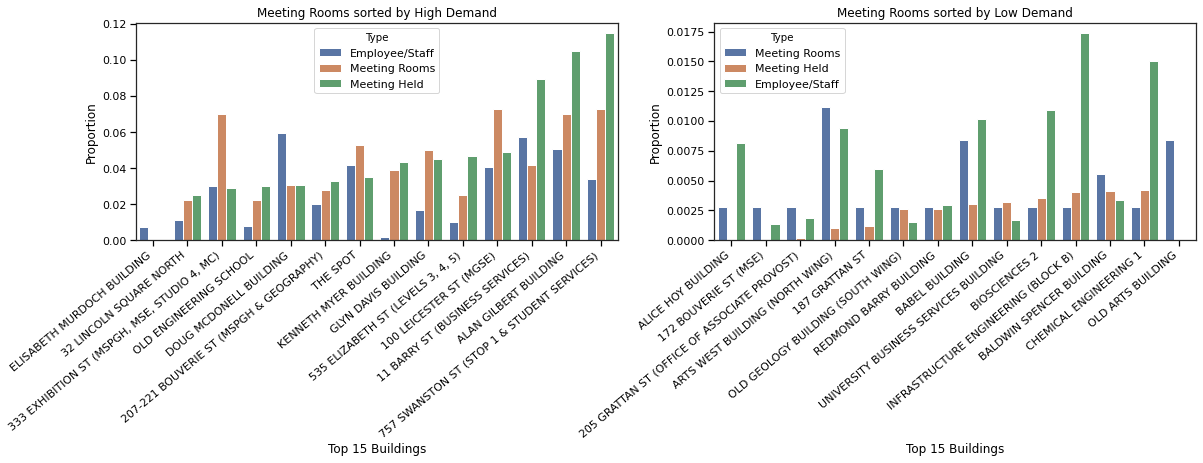

In [ ]:
#@title
gd = pd.merge(pd.merge(gdf2, gdf1, on=['Building Code','Building Name']),gdf3,on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Held')
    d['Value'].append(row['Meetings'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])

df = pd.DataFrame(data=d)
fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(19)
df1 = df.tail(40)
#df1.sort_values(by=['Type'], inplace=True)
df2 = df.head(40)
#df2.sort_values(by=['Type'], inplace=True)
ax1 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True,data=df1,ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax1.set_title("Meeting Rooms sorted by High Demand")

ax2 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df2,ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax2.set_title("Meeting Rooms sorted by Low Demand")
 
plt.show()

##### Is Room Condition factor for Meeting room usage?

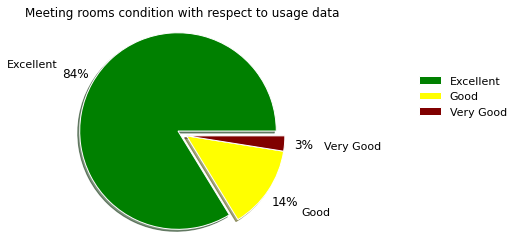

In [ ]:
#@title
# meeting room conditions
gdf = meeting_room_usage_data.groupby(by=['Room Condition 2018_x'], as_index=False).agg({'Room Code': pd.Series.nunique})
total_rooms = gdf['Room Code'].sum()
gdf['Room Code'] = (gdf['Room Code']/total_rooms)*100
gdf.sort_values(by=['Room Condition 2018_x'], inplace=True)
fig, ax = plt.subplots()
plt.rcParams['text.color'] = '#000'
plt.rcParams['axes.labelcolor']= '#000'
plt.rcParams['xtick.color'] = '#000'
plt.rcParams['ytick.color'] = '#000'
labels = gdf['Room Condition 2018_x'].tolist()
percentages = gdf['Room Code'].tolist()
color_palette_list = ['#008000', '#FFFF00', '#800000', '#00FF00']
explode=(0.1,0,0)
ax.pie(percentages, explode=explode, labels=labels,autopct='%1.0f%%', 
        colors = color_palette_list[0:3],
       shadow=True, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Meeting rooms condition with respect to usage data")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [ ]:
#@title
possible_meeting_rooms_df_f = meeting_room_usage_data[meeting_room_usage_data['Room Condition 2018_x']=='Excellent']
gdf1 = possible_meeting_rooms_df_f.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = meeting_room_usage_data.groupby(by=['Building Code','Building Name'], as_index=False)['Meetings'].sum()
gdf2.sort_values(by=['Meetings'], inplace=True)

gdf3 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf3.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_meetings = gdf2['Meetings'].sum()
gdf2['Meetings'] = gdf2['Meetings']/total_meetings

total_emp = gdf3['Employee Sequential ID'].sum()
gdf3['Employee Sequential ID'] = gdf3['Employee Sequential ID']/total_emp

In [ ]:
#@title
possible_meeting_rooms_df_f = meeting_room_usage_data[meeting_room_usage_data['Room Condition 2018_x']=='Good']
gdf4 = possible_meeting_rooms_df_f.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf4.sort_values(by=['Room Code'], inplace=True)

gdf5 = meeting_room_usage_data.groupby(by=['Building Code','Building Name'], as_index=False)['Meetings'].sum()
gdf5.sort_values(by=['Meetings'], inplace=True)

gdf6 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf6.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf4['Room Code'].sum()
gdf4['Room Code'] = gdf4['Room Code']/total_rooms

total_meetings = gdf5['Meetings'].sum()
gdf5['Meetings'] = gdf5['Meetings']/total_meetings

total_emp = gdf6['Employee Sequential ID'].sum()
gdf6['Employee Sequential ID'] = gdf6['Employee Sequential ID']/total_emp

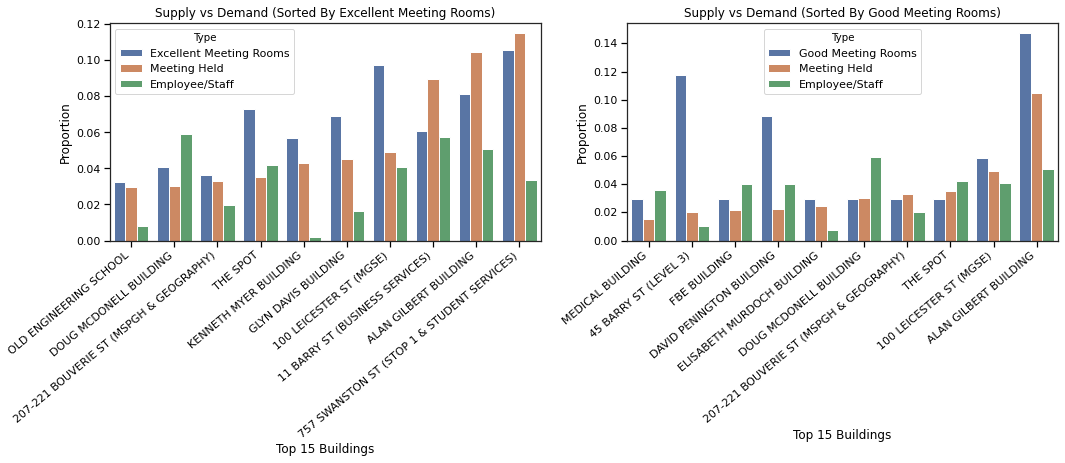

In [ ]:
#@title
# proportion graph
gd = pd.merge(pd.merge(gdf2, gdf1, on=['Building Code','Building Name']),gdf3,on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Excellent Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Held')
    d['Value'].append(row['Meetings'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df1 = pd.DataFrame(data=d)

gd = pd.merge(pd.merge(gdf5, gdf4, on=['Building Code','Building Name']),gdf6,on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Good Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Held')
    d['Value'].append(row['Meetings'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df2 = pd.DataFrame(data=d)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df1.tail(30),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax1.set_title("Supply vs Demand (Sorted By Excellent Meeting Rooms)")

ax2 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df2.tail(30),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax2.set_title("Supply vs Demand (Sorted By Good Meeting Rooms)")

plt.show()

## Student Toilet Facilities Analysis (Parkville Campus)

In [ ]:
merged_space_data_df_PAR = merged_space_data_df[merged_space_data_df['Campus Code']=='PAR']
merged_timetable_df_PAR = merged_timetable_df[merged_timetable_df['Campus Code']=='PAR']

### Supply of toilet facilities?

In [ ]:
possible_rooms = rm_category_type_df[rm_category_type_df['Room Type Definition'].str.contains("toilet|washroom")]
toilet_room_types = possible_rooms['Room Type'].tolist()

possible_toilets_df = merged_space_data_df_PAR[merged_space_data_df_PAR['Room Type'].isin(toilet_room_types)]
possible_toilets_df.shape

(1217, 18)

In [ ]:
possible_toilets_df['Room Capacity'].sum()

2278.0

In [ ]:
possible_toilets_df.groupby(by=['Room Capacity'],as_index=False).size()

Room Capacity
0.0     218
1.0     435
2.0     235
3.0     154
4.0      83
5.0      37
6.0      22
7.0       3
8.0      10
9.0       8
10.0      3
12.0      1
13.0      1
16.0      1
18.0      1
dtype: int64

In [ ]:
possible_rooms.head()

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
148,7,708,stud. ablutions,stud accom-ablutions,"a room containing shower, bath or toilet facil..."
171,8,818,wc acc. unisex,toilet - unisex accessible,includes accessible toilets in all buildings o...
173,8,820,wc female,toilet - female,includes female toilets in all buildings other...
174,8,821,wc male,toilet - male,includes male toilets in all buildings other t...
175,8,822,wc unisex,toilet - unisex,includes unisex toilets in all buildings other...


### Demand of toilet facilities?

In [ ]:
# possible classes throughout the year
merged_timetable_df_PAR.shape

(113342, 42)

In [ ]:
df = merged_timetable_df_PAR.groupby(by=['Activity dates'],as_index=False)['Planned Size'].sum()
df.sort_values(by=['Planned Size'], inplace=True)
df['Planned Size'].mean()

25150.07423580786

### Supply vs Demand analysis of preferences/factors?

#### 1. What if student wants to access a toilet facility in the **same building**? 

##### With respect to classes

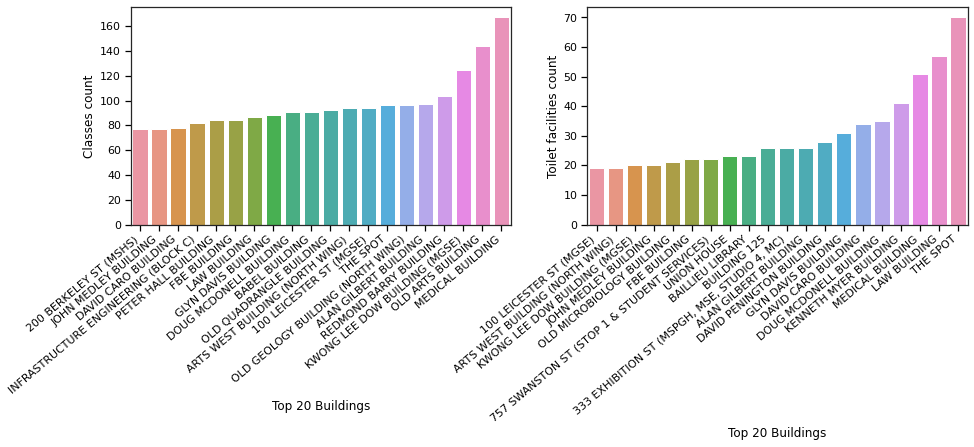

In [ ]:
#@title
gdf1 = merged_timetable_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Activity dates': pd.Series.nunique})
gdf1.sort_values(by=['Activity dates'], inplace=True)

# Top 20 buildings with the highest number of toilet facilities
gdf2 = possible_toilets_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Building Name", y='Activity dates', data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Buildings', ylabel='Classes count')

ax2 = sns.barplot(x="Building Name", y='Room Code', data=gdf2.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Buildings', ylabel='Toilet facilities count')

plt.show()

In [ ]:
#@title
total_classes = gdf1['Activity dates'].sum()
gdf1['Activity dates'] = gdf1['Activity dates']/total_classes

total_rooms = gdf2['Room Code'].sum()
gdf2['Room Code'] = gdf2['Room Code']/total_rooms

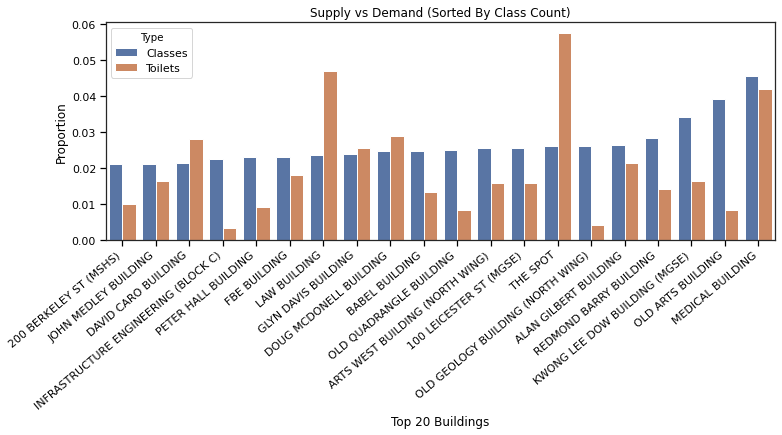

In [ ]:
#@title
# proportion graph
gd = pd.merge(gdf1, gdf2, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Classes')
    d['Value'].append(row['Activity dates'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Toilets')
    d['Value'].append(row['Room Code'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Class Count)")
plt.show()

##### With respect to possible students throughout the year?

In [ ]:
#@title
gdf1 = merged_timetable_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False)['Planned Size'].sum()
gdf1.sort_values(by=['Planned Size'], inplace=True)

# Top 20 buildings with the highest number of toilet facilities
gdf2 = possible_toilets_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique, 'Room Capacity':sum})
gdf2.sort_values(by=['Room Capacity'], inplace=True)

total_students = gdf1['Planned Size'].sum()
gdf1['Planned Size'] = gdf1['Planned Size']/total_students

total_size = gdf2['Room Capacity'].sum()
gdf2['Room Capacity'] = gdf2['Room Capacity']/total_size

In [ ]:
total_size

2278.0

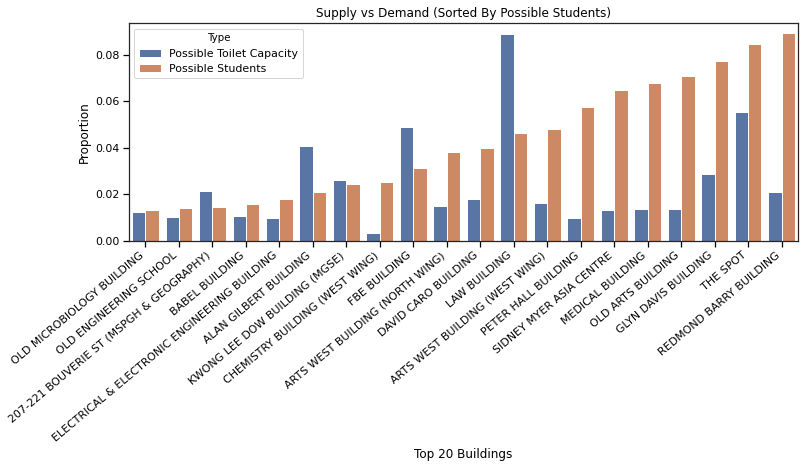

In [ ]:
#@title
# proportion graph
gd = pd.merge(gdf1, gdf2, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Possible Toilet Capacity')
    d['Value'].append(row['Room Capacity'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Possible Students')
    d['Value'].append(row['Planned Size'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Possible Students)")
plt.show()

#### 2. What if student wants to access a toilet facility on the **same floor**?

In [ ]:
#@title
# MEDICAL BUILDING
merged_timetable_df_PAR_f = merged_timetable_df_PAR[merged_timetable_df_PAR['Building Name']=='MEDICAL BUILDING']
gdf1 = merged_timetable_df_PAR_f.groupby(by=['Floor Name'], as_index=False)['Planned Size'].sum()
gdf1.sort_values(by=['Planned Size'], inplace=True)

possible_toilet_df_f = possible_toilets_df[possible_toilets_df['Building Name']=='MEDICAL BUILDING']
gdf2 = possible_toilet_df_f.groupby(by=['Floor Name'], as_index=False).agg({'Room Code':pd.Series.nunique, 'Room Capacity':sum})
gdf2.sort_values(by=['Room Capacity'], inplace=True)

total_students = gdf1['Planned Size'].sum()
gdf1['Planned Size'] = gdf1['Planned Size']/total_students

total_size = gdf2['Room Capacity'].sum()
gdf2['Room Capacity'] = gdf2['Room Capacity']/total_size

In [ ]:
#@title
# THE SPOT
merged_timetable_df_PAR_f = merged_timetable_df_PAR[merged_timetable_df_PAR['Building Name']=='THE SPOT']
gdf3 = merged_timetable_df_PAR_f.groupby(by=['Floor Name'], as_index=False)['Planned Size'].sum()
gdf3.sort_values(by=['Planned Size'], inplace=True)

possible_toilet_df_f = possible_toilets_df[possible_toilets_df['Building Name']=='THE SPOT']
gdf4 = possible_toilet_df_f.groupby(by=['Floor Name'], as_index=False).agg({'Room Code':pd.Series.nunique, 'Room Capacity':sum})
gdf4.sort_values(by=['Room Capacity'], inplace=True)

total_students = gdf3['Planned Size'].sum()
gdf3['Planned Size'] = gdf3['Planned Size']/total_students

total_size = gdf4['Room Capacity'].sum()
gdf4['Room Capacity'] = gdf4['Room Capacity']/total_size

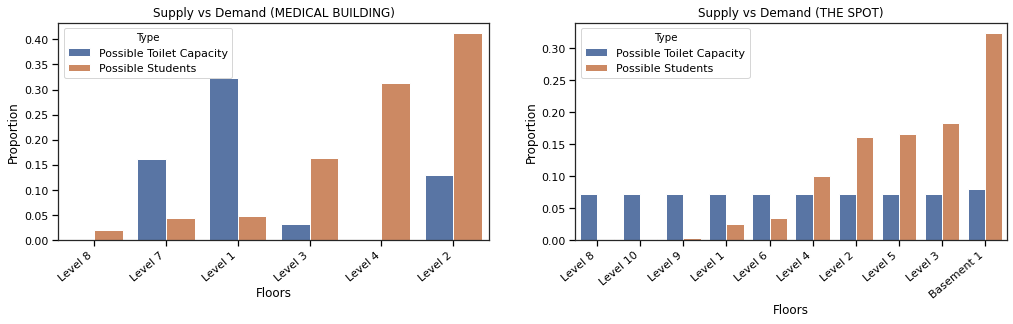

In [ ]:
#@title
# proportion graph
gd1 = pd.merge(gdf1, gdf2, on=['Floor Name'])
d = {
    'Floor Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd1.iterrows():
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Possible Toilet Capacity')
    d['Value'].append(row['Room Capacity'])
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Possible Students')
    d['Value'].append(row['Planned Size'])
df1 = pd.DataFrame(data=d)

# proportion graph
gd2 = pd.merge(gdf3, gdf4, on=['Floor Name'])
d = {
    'Floor Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd2.iterrows():
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Possible Toilet Capacity')
    d['Value'].append(row['Room Capacity'])
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Possible Students')
    d['Value'].append(row['Planned Size'])
df2 = pd.DataFrame(data=d)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Floor Name", y='Value', hue='Type', dodge=True, data=df1,ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Floors', ylabel='Proportion')
ax1.set_title("Supply vs Demand (MEDICAL BUILDING)")

ax2 = sns.barplot(x="Floor Name", y='Value', hue='Type', dodge=True, data=df2,ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Floors', ylabel='Proportion')
ax2.set_title("Supply vs Demand (THE SPOT)")

plt.show()

#### 3. What if student wants to access a toilet facility **nearest** to the class?

- We need to do spatial analysis
- More data is needed: coordinates and arrangement of room codes
- Floor plan of the building

#### 4. Accessibility of toilets with respect to their **condition**?

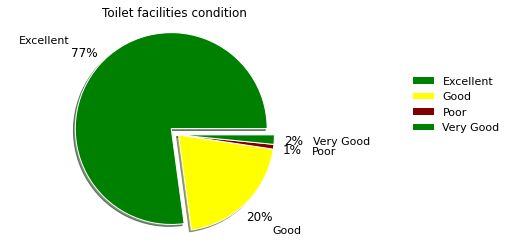

In [ ]:
#@title
# toilet conditions
gdf = possible_toilets_df.groupby(by=['Room Condition 2018'], as_index=False).agg({'Room Code': pd.Series.nunique})
total_rooms = gdf['Room Code'].sum()
gdf['Room Code'] = (gdf['Room Code']/total_rooms)*100
gdf.sort_values(by=['Room Condition 2018'], inplace=True)
fig, ax = plt.subplots()
plt.rcParams['text.color'] = '#000'
plt.rcParams['axes.labelcolor']= '#000'
plt.rcParams['xtick.color'] = '#000'
plt.rcParams['ytick.color'] = '#000'
labels = gdf['Room Condition 2018'].tolist()
percentages = gdf['Room Code'].tolist()
color_palette_list = ['#008000', '#FFFF00', '#800000', '#00FF00']
explode=(0.1,0,0,0)
ax.pie(percentages, explode=explode, labels=labels,autopct='%1.0f%%', 
        colors = color_palette_list[0:3],
       shadow=True, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Toilet facilities condition")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [ ]:
#@title
possible_toilet_df_f = possible_toilets_df[possible_toilets_df['Room Condition 2018']=='Excellent']
gdf1 = possible_toilet_df_f.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique, 'Room Capacity':sum})
gdf1.sort_values(by=['Room Capacity'], inplace=True)

gdf2 = merged_timetable_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False)['Planned Size'].sum()
gdf2.sort_values(by=['Planned Size'], inplace=True)

total_rooms = gdf1['Room Capacity'].sum()
gdf1['Room Capacity'] = gdf1['Room Capacity']/total_rooms

total_students = gdf2['Planned Size'].sum()
gdf2['Planned Size'] = gdf2['Planned Size']/total_students

In [ ]:
#@title
possible_toilet_df_f = possible_toilets_df[possible_toilets_df['Room Condition 2018']=='Good']
gdf3 = possible_toilet_df_f.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique,'Room Capacity':sum})
gdf3.sort_values(by=['Room Capacity'], inplace=True)

gdf4 = merged_timetable_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False)['Planned Size'].sum()
gdf4.sort_values(by=['Planned Size'], inplace=True)

total_rooms = gdf3['Room Capacity'].sum()
gdf3['Room Capacity'] = gdf3['Room Capacity']/total_rooms

total_classes = gdf4['Planned Size'].sum()
gdf4['Planned Size'] = gdf4['Planned Size']/total_classes

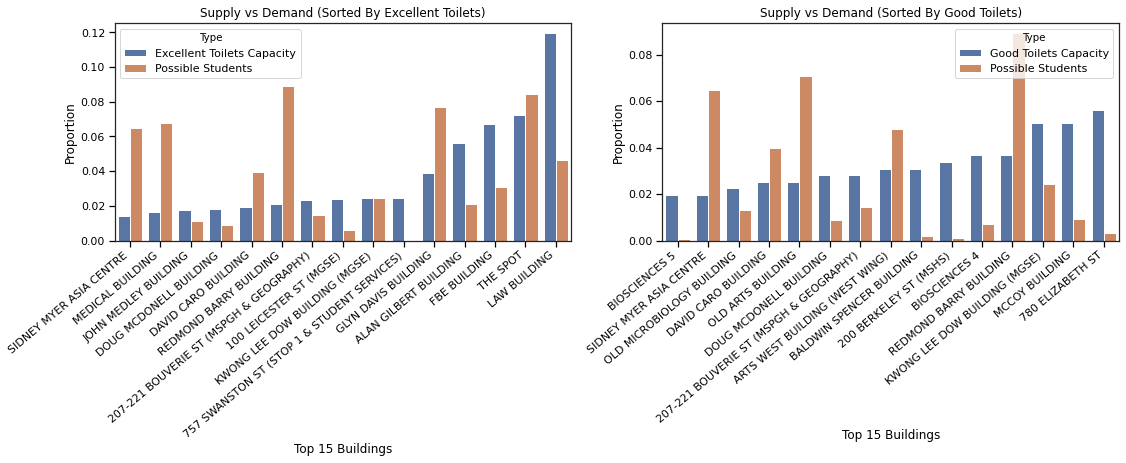

In [ ]:
#@title
# proportion graph
gd = pd.merge(gdf1, gdf2, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Excellent Toilets Capacity')
    d['Value'].append(row['Room Capacity'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Possible Students')
    d['Value'].append(row['Planned Size'])
df1 = pd.DataFrame(data=d)

gd = pd.merge(gdf3, gdf4, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Good Toilets Capacity')
    d['Value'].append(row['Room Capacity'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Possible Students')
    d['Value'].append(row['Planned Size'])
df2 = pd.DataFrame(data=d)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(18)

ax1 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df1.tail(30),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax1.set_title("Supply vs Demand (Sorted By Excellent Toilets)")

ax2 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df2.tail(30),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax2.set_title("Supply vs Demand (Sorted By Good Toilets)")

plt.show()

#### 5. Accessibility of toilets with respect to their **room size**?

In [ ]:
#@title
gdf1 = merged_timetable_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False)['Room Area m²'].mean()
gdf1.sort_values(by=['Room Area m²'], inplace=True)

# Top 20 buildings with the highest number of toilet facilities
gdf2 = merged_timetable_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False)['Planned Size'].sum()
gdf2.sort_values(by=['Planned Size'], inplace=True)

total_area = gdf1['Room Area m²'].sum()
gdf1['Room Area m²'] = gdf1['Room Area m²']/total_area

total_students = gdf2['Planned Size'].sum()
gdf2['Planned Size'] = gdf2['Planned Size']/total_students

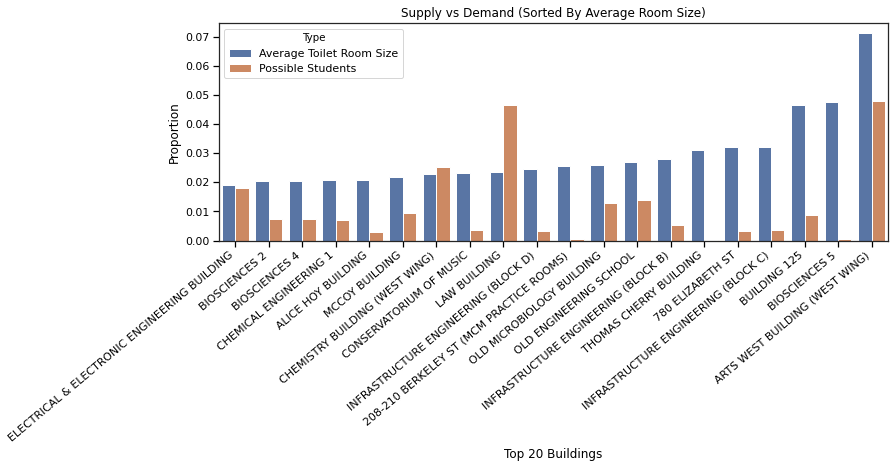

In [ ]:
#@title
# proportion graph
gd = pd.merge(gdf1, gdf2, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Average Toilet Room Size')
    d['Value'].append(row['Room Area m²'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Possible Students')
    d['Value'].append(row['Planned Size'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Average Room Size)")
plt.show()

In [ ]:
#@title
# MEDICAL BUILDING
merged_timetable_df_PAR_f = merged_timetable_df_PAR[merged_timetable_df_PAR['Building Name']=='MEDICAL BUILDING']
gdf2 = merged_timetable_df_PAR_f.groupby(by=['Floor Name'], as_index=False)['Planned Size'].sum()
gdf2.sort_values(by=['Planned Size'], inplace=True)

possible_toilet_df_f = possible_toilets_df[possible_toilets_df['Building Name']=='MEDICAL BUILDING']
gdf1 = possible_toilet_df_f.groupby(by='Floor Name', as_index=False)['Room Area m²'].mean()
gdf1.sort_values(by=['Room Area m²'], inplace=True)

total_area = gdf1['Room Area m²'].sum()
gdf1['Room Area m²'] = gdf1['Room Area m²']/total_area

total_students = gdf2['Planned Size'].sum()
gdf2['Planned Size'] = gdf2['Planned Size']/total_students

In [ ]:
#@title
# THE SPOT
merged_timetable_df_PAR_f = merged_timetable_df_PAR[merged_timetable_df_PAR['Building Name']=='LAW BUILDING']
gdf4 = merged_timetable_df_PAR_f.groupby(by=['Floor Name'], as_index=False)['Planned Size'].sum()
gdf4.sort_values(by=['Planned Size'], inplace=True)

possible_toilet_df_f = possible_toilets_df[possible_toilets_df['Building Name']=='LAW BUILDING']
gdf3 = possible_toilet_df_f.groupby(by='Floor Name', as_index=False)['Room Area m²'].mean()
gdf3.sort_values(by=['Room Area m²'], inplace=True)

total_area = gdf3['Room Area m²'].sum()
gdf3['Room Area m²'] = gdf3['Room Area m²']/total_area

total_students = gdf4['Planned Size'].sum()
gdf4['Planned Size'] = gdf4['Planned Size']/total_students

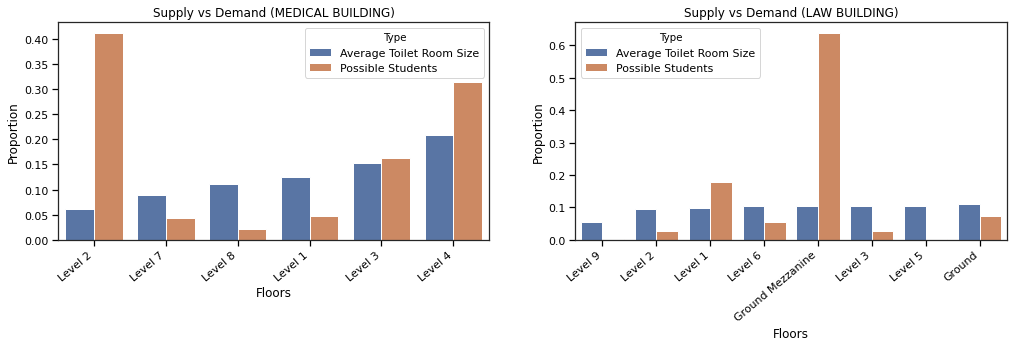

In [ ]:
#@title
# proportion graph
gd1 = pd.merge(gdf1, gdf2, on=['Floor Name'])
d = {
    'Floor Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd1.iterrows():
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Average Toilet Room Size')
    d['Value'].append(row['Room Area m²'])
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Possible Students')
    d['Value'].append(row['Planned Size'])
df1 = pd.DataFrame(data=d)

# proportion graph
gd2 = pd.merge(gdf3, gdf4, on=['Floor Name'])
d = {
    'Floor Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd2.iterrows():
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Average Toilet Room Size')
    d['Value'].append(row['Room Area m²'])
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Possible Students')
    d['Value'].append(row['Planned Size'])
df2 = pd.DataFrame(data=d)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Floor Name", y='Value', hue='Type', dodge=True, data=df1,ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Floors', ylabel='Proportion')
ax1.set_title("Supply vs Demand (MEDICAL BUILDING)")

ax2 = sns.barplot(x="Floor Name", y='Value', hue='Type', dodge=True, data=df2,ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Floors', ylabel='Proportion')
ax2.set_title("Supply vs Demand (LAW BUILDING)")

plt.show()

#### 6. Supply of toilet facilities with respect to **class duration**?

In [ ]:
#@title
gdf1 = merged_timetable_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False)['Class Duration In Minutes'].mean()
gdf1.sort_values(by=['Class Duration In Minutes'], inplace=True)

# Top 20 buildings with the highest number of toilet facilities
gdf2 = possible_toilets_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique, 'Room Capacity':sum})
gdf2.sort_values(by=['Room Capacity'], inplace=True)

total_dur = gdf1['Class Duration In Minutes'].sum()
gdf1['Class Duration In Minutes'] = gdf1['Class Duration In Minutes']/total_dur

total_rooms = gdf2['Room Capacity'].sum()
gdf2['Room Capacity'] = gdf2['Room Capacity']/total_rooms

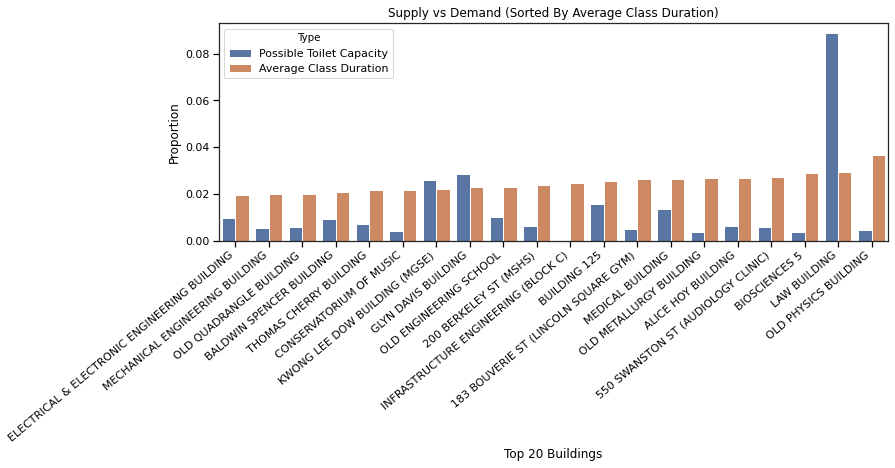

In [ ]:
#@title
# proportion graph
gd = pd.merge(gdf1, gdf2, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Possible Toilet Capacity')
    d['Value'].append(row['Room Capacity'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Average Class Duration')
    d['Value'].append(row['Class Duration In Minutes'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Average Class Duration)")
plt.show()